In [1]:
import sys
sys.path.insert(0, '/home/misa/git_repositories/APDFT/prototyping/apdft-ofdft-cpmd/')

from profess_calculator import PROFESS_CPMD
import profess_io as pio
from cpmd import initialize_atoms
from density_calculators import DensityOptimizerCPMD

from ase.md.verlet import VelocityVerlet
from ase import units
from ase import Atoms
from ase.io.trajectory import Trajectory

import numpy as np
from matplotlib import pyplot as plt

import os
#import pixiedust

In [ ]:
base_dir = '/home/misa/projects/APDFT-CPMD/data/CPMD/debug_density_propagation/'
target_dirs = []
for i in range(3):
    target_dirs.append(base_dir+f'step{i+1}')

In [ ]:
target_dirs

### Make ion files for every step

In [ ]:
traj = Trajectory('/home/misa/projects/APDFT-CPMD/data/CPMD/debug_Si8/Si8_debug.traj')
pp_names = ['si.lda.recpot']

In [ ]:
for i in range(3):
    td=target_dirs[i]
    atoms = traj[i]
    ion_file = pio.generate_ion_file(atoms.get_cell(), atoms.get_chemical_symbols(), atoms.get_positions(), 'CART', pp_names)
    pio.write_file(td+'/debug.ion', ion_file)

In [ ]:
traj[2].get_positions()

### Calculate dEdX at every step

### Step 0 -> 1

In [ ]:
# initialize atoms object from PROFESS files
pos_file = '/home/misa/projects/APDFT-CPMD/data/CPMD/debug_density_propagation/step0/debug.ion'
vel_file = '/home/misa/projects/APDFT-CPMD/data/BOMD/ase_NVE/Si8_hc/vel.restart_file'
atoms = initialize_atoms(pos_file, vel_file, pos_type='CART')

# set parameters for PROFESS calculation
profess_path = '/home/misa/software/PROFESS-1/PROFESS' # on avl24
#profess_path = '/home/misa/opt/PROFESS-1/PROFESS' # on avl51
run_dir = '/home/misa/projects/APDFT-CPMD/data/CPMD/debug_density_propagation/step0'
inpt_name = 'debug'

mu = 380
dt = 0.096 # time interval in fs
t = 9.6 # total time in fs

# create and initialize DensityOptimizer
DensOpt = DensityOptimizerCPMD()
DensOpt.initialize(atoms, dt*units.fs, inpt_name, mu, profess_path, run_dir)

DensOpt.optimize_vv()

### Step 1 -> 2

In [ ]:
# initialize atoms object from PROFESS files
pos_file = '/home/misa/projects/APDFT-CPMD/data/CPMD/debug_density_propagation/step1/debug.ion'
vel_file = '/home/misa/projects/APDFT-CPMD/data/BOMD/ase_NVE/Si8_hc/vel.restart_file'
atoms = initialize_atoms(pos_file, vel_file, pos_type='CART')

# set parameters for PROFESS calculation
profess_path = '/home/misa/software/PROFESS-1/PROFESS' # on avl24
#profess_path = '/home/misa/opt/PROFESS-1/PROFESS' # on avl51
run_dir = '/home/misa/projects/APDFT-CPMD/data/CPMD/debug_density_propagation/step1'
inpt_name = 'debug'

mu = 380
dt = 0.096 # time interval in fs
t = 9.6 # total time in fs

# create and initialize DensityOptimizer
DensOpt = DensityOptimizerCPMD()
DensOpt.initialize(atoms, dt*units.fs, inpt_name, mu, profess_path, run_dir)
DensOpt.step = 1
DensOpt.optimize_vv()

### Step 2 -> 3

In [2]:
# initialize atoms object from PROFESS files
pos_file = '/home/misa/projects/APDFT-CPMD/data/CPMD/debug_density_propagation/step2/debug.ion'
vel_file = '/home/misa/projects/APDFT-CPMD/data/BOMD/ase_NVE/Si8_hc/vel.restart_file'
atoms = initialize_atoms(pos_file, vel_file, pos_type='CART')

# set parameters for PROFESS calculation
profess_path = '/home/misa/software/PROFESS-1/PROFESS' # on avl24
#profess_path = '/home/misa/opt/PROFESS-1/PROFESS' # on avl51
run_dir = '/home/misa/projects/APDFT-CPMD/data/CPMD/debug_density_propagation/step2'
inpt_name = 'debug'

mu = 380
dt = 0.096 # time interval in fs
t = 9.6 # total time in fs

# create and initialize DensityOptimizer
DensOpt = DensityOptimizerCPMD()
DensOpt.initialize(atoms, dt*units.fs, inpt_name, mu, profess_path, run_dir)
DensOpt.step = 2
DensOpt.optimize_vv()

### Step 3 -> 4

In [3]:
# initialize atoms object from PROFESS files
pos_file = '/home/misa/projects/APDFT-CPMD/data/CPMD/debug_density_propagation/step3/debug.ion'
vel_file = '/home/misa/projects/APDFT-CPMD/data/BOMD/ase_NVE/Si8_hc/vel.restart_file'
atoms = initialize_atoms(pos_file, vel_file, pos_type='CART')

# set parameters for PROFESS calculation
profess_path = '/home/misa/software/PROFESS-1/PROFESS' # on avl24
#profess_path = '/home/misa/opt/PROFESS-1/PROFESS' # on avl51
run_dir = '/home/misa/projects/APDFT-CPMD/data/CPMD/debug_density_propagation/step3'
inpt_name = 'debug'

mu = 380
dt = 0.096 # time interval in fs
t = 9.6 # total time in fs

# create and initialize DensityOptimizer
DensOpt = DensityOptimizerCPMD()
DensOpt.initialize(atoms, dt*units.fs, inpt_name, mu, profess_path, run_dir)
DensOpt.step = 3
DensOpt.optimize_vv()

In [17]:
dEdX0 = np.loadtxt('/home/misa/projects/APDFT-CPMD/data/CPMD/debug_Si8/step0/dEdX', skiprows= 1)
dEdX1 = np.loadtxt('/home/misa/projects/APDFT-CPMD/data/CPMD/debug_Si8/step1/dEdX', skiprows= 1)
dEdX2 = np.loadtxt('/home/misa/projects/APDFT-CPMD/data/CPMD/debug_Si8/step2/dEdX', skiprows= 1)
dEdX3 = np.loadtxt('/home/misa/projects/APDFT-CPMD/data/CPMD/debug_Si8/step3/dEdX', skiprows= 1)
dEdX4 = np.loadtxt('/home/misa/projects/APDFT-CPMD/data/CPMD/debug_Si8/step4/dEdX', skiprows= 1)

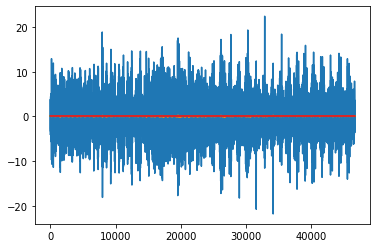

In [14]:
fig, ax = plt.subplots(1,1)

ax.plot(dEdX4)
ax.plot(dEdX3)
ax.plot(dEdX2)
ax.plot(dEdX1)


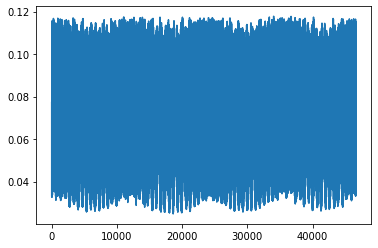

In [27]:
fig, ax = plt.subplots(1,1)

#ax.plot(dEdX3)
#ax.plot(dEdX1-dEdX0)
#ax.plot(dEdX1)
ax.plot(dEdX0)

In [26]:
np.amin(dEdX1-dEdX0)

0.0